In [1]:
import pandas as pd
import numpy as np
from src.Particle import ParticleType
from src.JetBuilder import JetBuilder
from src.JetImage import JetImage, JetImageCalculatorPandas, JetImageAvarageCalculator
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
data_gluon = pd.read_csv('../Data/Test/g_jets.csv', header=None)
data_quark = pd.read_csv('../Data/Test/q_jets.csv', header=None)
data_top = pd.read_csv('../Data/Test/t_jets.csv', header=None)

In [4]:
data_quark.shape


(25602, 120)

****Single jet images****

In [7]:
jet_image_pandas = JetImage((-0.4, 0.4), (-0.4, 0.4), 16, 16, JetImageCalculatorPandas())

In [8]:
# first_gluon_image = jet_image.create_jet_image(top_jets[0])
first_gluon_image_pd = jet_image_pandas.create_jet_image(data_quark.loc[10])

In [9]:
# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

Text(0, 0.5, '$\\eta^{rel}$')

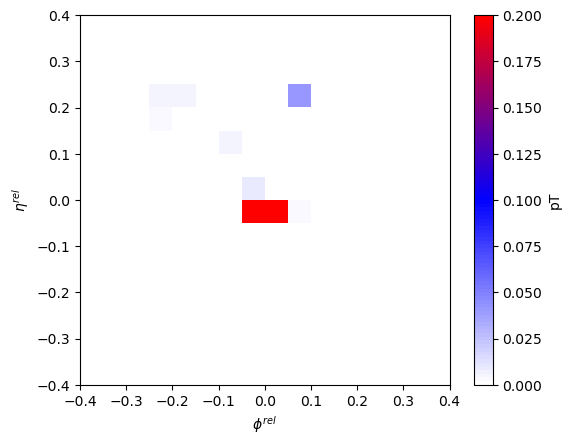

In [10]:
# import numpy as np
plt.imshow(first_gluon_image_pd, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

Text(0, 0.5, '$\\eta^{rel}$')

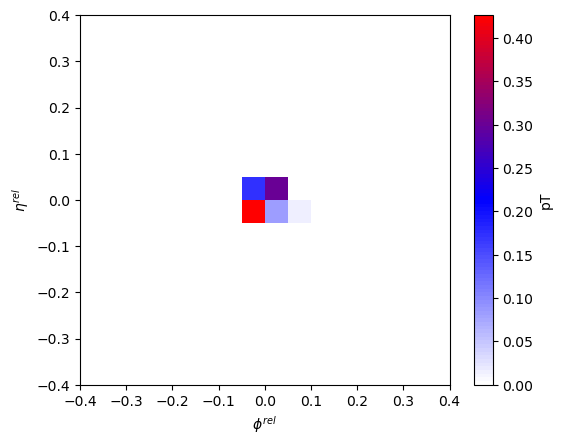

In [8]:
# import numpy as np
plt.imshow(first_gluon_image_pd, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4))
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Avarage Jet Image****

In [11]:
single_jet_image = JetImageCalculatorPandas()
avg_jet_image = JetImageAvarageCalculator(jet_image_calculator=single_jet_image)
jet_image_avg = JetImage((-0.4, 0.4), (-0.4, 0.4), 16, 16, avg_jet_image)

****Top jets****

In [15]:
from matplotlib import rc
import os
os.environ['PATH'] = f"/Library/TeX/texbin:{os.environ['PATH']}"
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times']})
plt.rcParams.update({'font.size': 15})

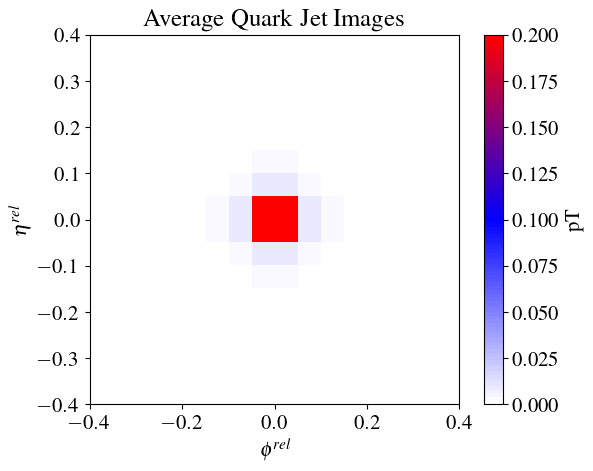

In [19]:
# evaluating the image using Jet class
avg_jet_image = jet_image_avg.create_jet_image(data_quark.to_numpy())
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')
plt.title(r'Average Quark Jet Images')
plt.savefig('AverageQuarkJetImages.png', bbox_inches="tight", dpi=300)

Text(0, 0.5, '$\\eta^{rel}$')

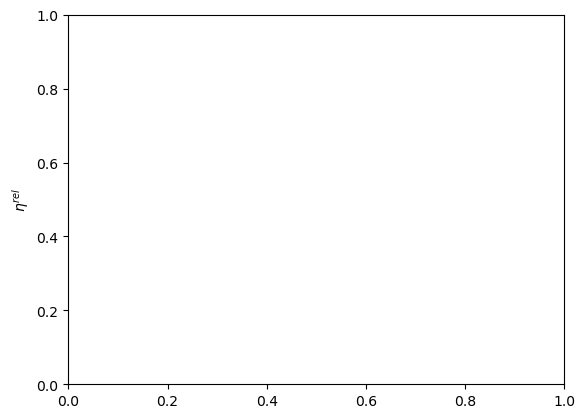

In [16]:
plt.ylabel(r'$\eta^{rel}$')

Text(0, 0.5, '$\\eta^{rel}$')

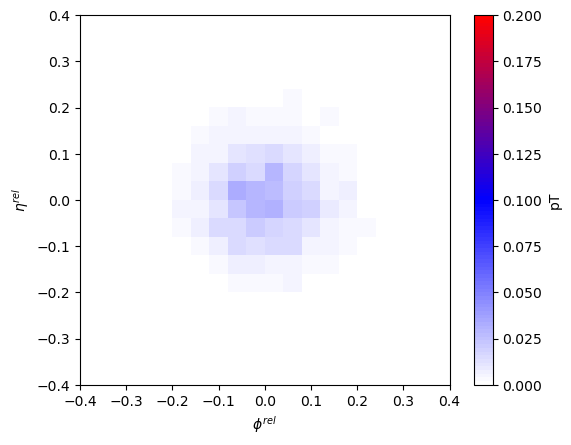

In [28]:
# evaluating the image using Pandas data frame
avg_jet_image = jet_image_avg_pd.create_jet_image(data_top.loc[:500].to_numpy())
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Gluon Jets****

Text(0, 0.5, '$\\eta^{rel}$')

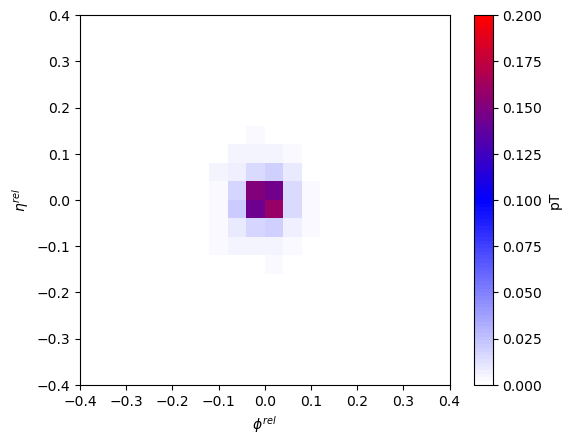

In [17]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(gluon_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Quark Jets****

Text(0, 0.5, '$\\eta^{rel}$')

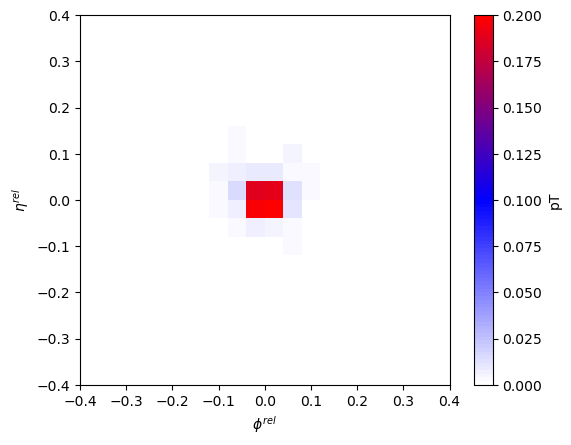

In [18]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(quark_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Energy Flow Polynomials****

In [4]:
import energyflow as ef

In [5]:
# all EFPs with d <= 5 
efpset = ef.EFPSet('d<=5', ('p==',1), measure='hadr', beta=1, normed=False, verbose=True)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 54
  Composite: 0
  Total:  54


In [28]:
# information about each polynomial 
index = 1
graph = efpset.graphs(index)

n, _, d, v, _, c, p, _ = efpset.specs[index]

print("Graph:", graph)
print("Number of vertices, n:", n)
print("Number of edges,    d:", d)
print("Maximum valency,    v:", v)
print("VE complexity,      c:", c)
print("Number of primes,   p:", p)

Graph: [(0, 1)]
Number of vertices, n: 2
Number of edges,    d: 1
Maximum valency,    v: 1
VE complexity,      c: 2
Number of primes,   p: 1


In [21]:
# calculating the EFPs for each type of jets 
# gluon_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in gluon_jets])
# quarks_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in quark_jets])
# top_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in top_jets])

In [4]:
quarks_efps = np.load("../Data/Trainning/q_jets_efps_d5_primed.npy")
gluon_efps = np.load("../Data/Trainning/g_jets_efps_d5_primed.npy")
top_efps = np.load("../Data/Trainning/t_jets_efps_d5_primed.npy")

In [5]:
# evaluating the mean value
mean_efps_gluons = np.mean(gluon_efps, axis=0)
mean_efps_quarks = np.mean(quarks_efps, axis=0)
mean_efps_top = np.mean(top_efps, axis=0)

Avg EFP gluon: 0.9069195949159397
Avg EFP light quarks: 0.9771943068854052
Avg EFP top: 0.9139187872691595


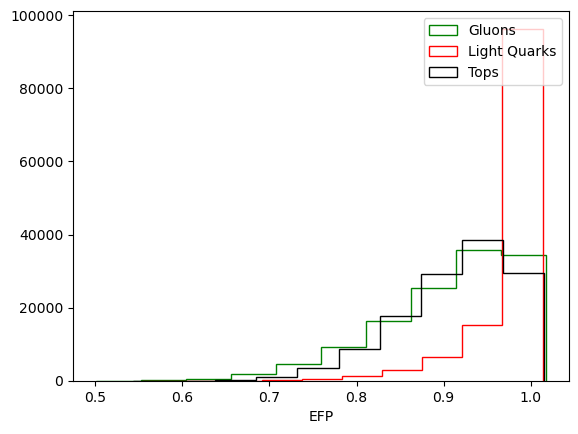

In [8]:
# ploting the distribution 
index = 0
print(f"Avg EFP gluon: {mean_efps_gluons[index]}")
print(f"Avg EFP light quarks: {mean_efps_quarks[index]}")
print(f"Avg EFP top: {mean_efps_top[index]}")
plt.hist(gluon_efps[:, index], color='green', label='Gluons', histtype='step')
plt.hist(quarks_efps[:, index], color='red', label='Light Quarks', histtype='step')
plt.hist(top_efps[:, index], color='black', label='Tops', histtype='step')
plt.xlabel('EFP')
plt.legend(loc='upper right')

****Some distributions****

***PT distribution***

In [25]:
gluons_pt = np.array([jet.momentum.pt / len(jet) for jet in gluon_jets])
quark_pt = np.array([jet.momentum.pt / len(jet) for jet in quark_jets])
top_pt = np.array([jet.momentum.pt / len(jet) for jet in top_jets])

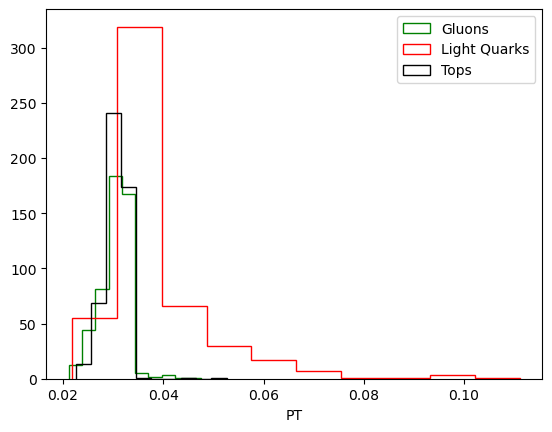

In [26]:
plt.hist(gluons_pt, color='green', label='Gluons', histtype='step')
plt.hist(quark_pt, color='red', label='Light Quarks', histtype='step')
plt.hist(top_pt, color='black', label='Tops', histtype='step')
plt.xlabel('PT')
plt.legend(loc='upper right')

***Eta distribution***

In [27]:
gluons_eta = np.array([jet.momentum.eta / len(jet) for jet in gluon_jets])
quark_eta = np.array([jet.momentum.eta / len(jet) for jet in quark_jets])
top_eta = np.array([jet.momentum.eta / len(jet) for jet in top_jets])

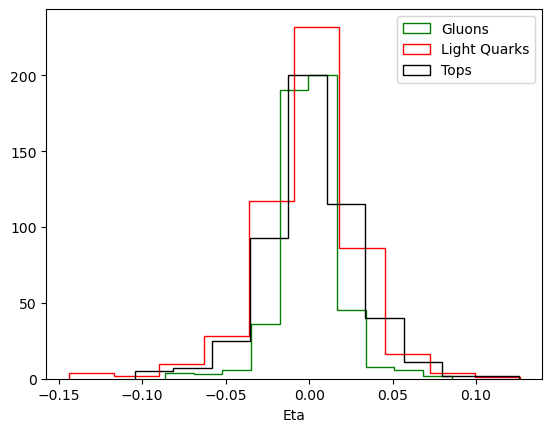

In [28]:
plt.hist(gluons_eta, color='green', label='Gluons', histtype='step')
plt.hist(quark_eta, color='red', label='Light Quarks', histtype='step')
plt.hist(top_eta, color='black', label='Tops', histtype='step')
plt.xlabel('Eta')
plt.legend(loc='upper right')

***Phi distribution***

In [29]:
gluons_phi = np.array([jet.momentum.phi / len(jet) for jet in gluon_jets])
quark_phi = np.array([jet.momentum.phi / len(jet) for jet in quark_jets])
top_phi = np.array([jet.momentum.phi / len(jet) for jet in top_jets])

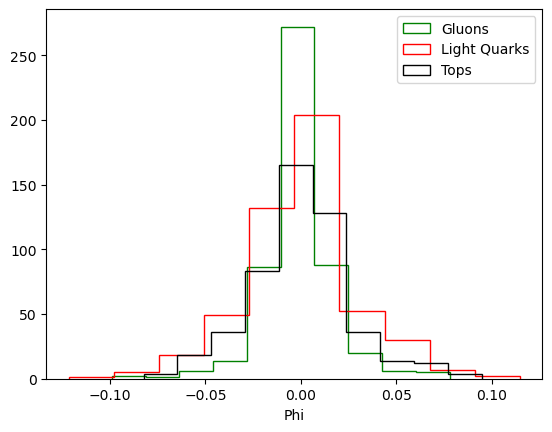

In [30]:
plt.hist(gluons_phi, color='green', label='Gluons', histtype='step')
plt.hist(quark_phi, color='red', label='Light Quarks', histtype='step')
plt.hist(top_phi, color='black', label='Tops', histtype='step')
plt.xlabel('Phi')
plt.legend(loc='upper right')

#### Jet Image processing

In [9]:
from src.Preprocessing import PreprocessingJetImages

In [10]:
jet_image_processing = PreprocessingJetImages(phi_range=(-0.4, 0.4), eta_range=(-0.4, 0.4), n_bins_phi=16, n_bins_eta=16)

In [18]:
# joinning data frames
all_jets = pd.concat([data_quark, data_gluon], axis=0)
all_jets.reset_index(drop=True, inplace=True)
# defining the dictionary with the order of jets in the full data frame
jets_order = {
    # ParticleType.Top: (0, len(data_top) - 1), ?
    ParticleType.LightQuark: (0, len(data_quark) - 1),
    ParticleType.Gluon: (len(data_quark), len(data_quark) + len(data_gluon) - 1)
}

In [19]:
X = jet_image_processing.transform(X=all_jets.to_numpy(), y=jets_order)
labels = jet_image_processing.jet_labels

In [20]:
labels

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [13]:
# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

Label: [0. 0. 1.]


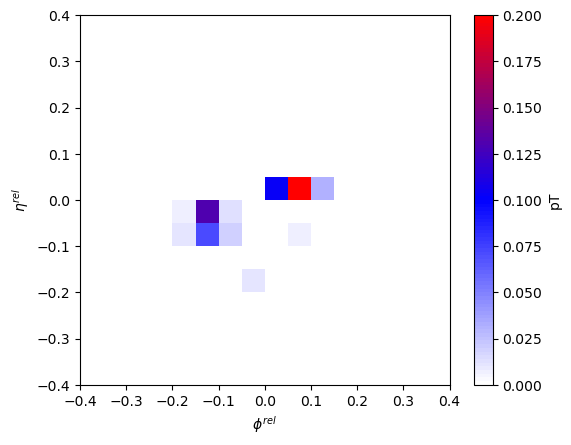

In [14]:
index = 130
plt.imshow(X[index].reshape((16, 16)), cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')
print("Label:", labels[index])

#### EFPs Preprocessing

In [5]:
from src.Preprocessing import PreprocessingEFPs

In [6]:
efp_processing = PreprocessingEFPs(d=5)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 54
  Composite: 48
  Total:  102


In [7]:
X = efp_processing.transform(X=data_gluon[:100].to_numpy(), y={ParticleType.Gluon: (0, 99)})

In [8]:
X

array([[1.77193229e-01, 4.34935953e-02, 1.16878922e-02, ...,
        2.41972869e-04, 1.79053346e-04, 1.74676953e-04],
       [2.23596035e-02, 2.19374030e-03, 3.19081237e-04, ...,
        2.45232207e-08, 1.43625015e-08, 5.58882473e-09],
       [6.12983774e-02, 8.39122065e-03, 1.33141029e-03, ...,
        1.93273396e-06, 1.22158106e-06, 8.65455800e-07],
       ...,
       [3.69814014e-02, 6.00454603e-03, 1.57990551e-03, ...,
        3.03689848e-07, 1.77786220e-07, 6.91698487e-08],
       [2.02182021e-02, 1.91307574e-03, 4.19288227e-04, ...,
        1.58110156e-08, 9.33088929e-09, 3.37841248e-09],
       [3.33481291e-02, 3.37909304e-03, 4.34649134e-04, ...,
        1.25318323e-07, 7.91055923e-08, 4.12436766e-08]])

In [9]:
efp_processing.jet_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
efp_processing.efps_set.graphs(2)

[(0, 1), (0, 1)]